             Date Condition   dew  fog  hail  Humidity  pressure  rain  snow  \
0  19961101-11:00     Smoke   9.0    0     0      27.0    1010.0     0     0   
1  19961101-12:00     Smoke  10.0    0     0      32.0   -9999.0     0     0   
2  19961101-13:00     Smoke  11.0    0     0      44.0   -9999.0     0     0   
3  19961101-14:00     Smoke  10.0    0     0      41.0    1010.0     0     0   
4  19961101-16:00     Smoke  11.0    0     0      47.0    1011.0     0     0   

   Temperature  thunder  tornado  
0         30.0        0        0  
1         28.0        0        0  
2         24.0        0        0  
3         24.0        0        0  
4         23.0        0        0  
(100990, 12)
        Humidity  Temperature
0           27.0         30.0
1           32.0         28.0
2           44.0         24.0
3           41.0         24.0
4           47.0         23.0
...          ...          ...
100985      25.0         34.0
100986      16.0         38.0
100987      14.0         3

<Figure size 1440x1440 with 0 Axes>

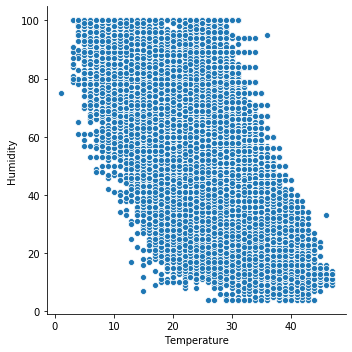

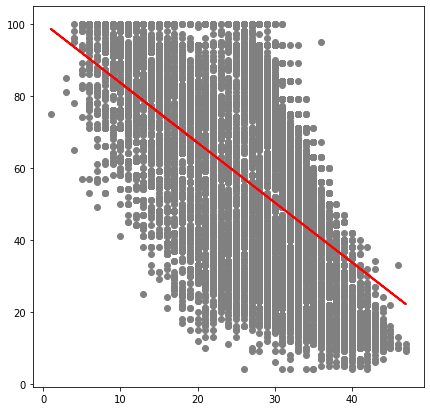

0.3402288871558321

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#enter dataset
dataset = pd.read_csv("testset.csv")
print(dataset.head(5))
print(dataset.shape)

# drop or delete the unnecessary columns in the data. 
clean_data_1 = dataset.drop(['Date','Condition','dew','fog',
                             'hail','pressure','rain','snow','thunder','tornado'], axis = 1) 
print(clean_data_1)
clean_data_1.to_csv('India_weather_prediction_p1.csv')

#to check data types
data_type = clean_data_1.dtypes
print(data_type)

# Get names of indexes for which column Age has value 30
indexNames = clean_data_1[ clean_data_1['Humidity'] == 0].index 
# Delete these row indexes from dataFrame
clean_data_1.drop(indexNames , inplace=True)

# Get names of indexes for which column Age has value 30
indexNames = clean_data_1[ clean_data_1['Humidity'] >= 101].index 
# Delete these row indexes from dataFrame
clean_data_1.drop(indexNames , inplace=True)

# Get names of indexes for which column Age has value 30
indexNames = clean_data_1[ clean_data_1['Temperature'] >= 55].index 
# Delete these row indexes from dataFrame
clean_data_1.drop(indexNames , inplace=True)

clean_data_1.dropna(subset = ["Humidity"], inplace=True)
clean_data_1.dropna(subset = ["Temperature"], inplace=True)

print(clean_data_1)

# statistical parameters
stats = clean_data_1.describe()
print(stats)

#plot
plt.figure(figsize=(20,20))
sns.relplot(x='Temperature',y='Humidity',data=clean_data_1)

#for all the plots uncomment this
#all_plot = sns.PairGrid(clean_data_1)
#all_plot.map(plt.scatter)

# making vectors of 2 columns used for linear regression 
X = clean_data_1['Temperature'].values.reshape(-1,1)
Y = clean_data_1['Humidity'].values.reshape(-1,1)
print(X)
print(Y)

#splitting data set in two parts 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

#training the model by regression algo
reg_data = LinearRegression()
reg_data.fit(X_train, Y_train)

#results after training the model
B0 = reg_data.intercept_
B1 = reg_data.coef_
print(B0)
print(B1)

#prediction using test data set
Y_prediction = reg_data.predict(X_test)

#comparing actual and predicted data
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_prediction.flatten()})
print(df)

#plotting results
plt.figure(figsize=(7,7))
plt.scatter(X_test, Y_test, color='gray')
plt.plot(X_test, Y_prediction, color='red', linewidth=2)
plt.show()

r2_score(Y_test, Y_prediction)